In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFG
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

# Linear Regression

## Bước 1: Đọc dữ liệu

In [ ]:
df_salary = pd.read_csv('/content/drive/MyDrive/Salary_Data.csv')
df_salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
X = df_salary.drop(columns=['Salary'])
y = df_salary['Salary']

In [ ]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


## Bước 2: Chuẩn hóa dữ liệu

In [ ]:
for i in range(len(X)):
    X /= X.abs().max()
X

,YearsExperience
0,0.104762
1,0.123810
2,0.142857
3,0.190476
4,0.209524
5,0.276190
6,0.285714
7,0.304762
8,0.304762
9,0.352381


In [ ]:
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

## Bước 3: Chia data với KFold

In [ ]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
model = LinearRegression()
scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)

In [ ]:
scores

array([0.76166815, 0.96306166, 0.95137013, 0.95191344, 0.94105175])

In [ ]:
print(f"Accuracy: {np.mean(scores)}")

Accuracy: 0.913813025114864


## Bước 4: Visualization

In [ ]:
y_pred = cross_val_predict(model, X, y, cv=cv)
y_pred

array([ 34460.37365254,  36448.47122933,  40201.20297271,  45695.84849097,
        47502.32211571,  53430.53717631,  54455.22254853,  56355.75849198,
        56271.73218977,  61007.05721221,  62008.38247653,  63848.25222567,
        63848.25222567,  64908.17023747,  67608.14931932,  72234.22761163,
        74222.32518842,  75074.50510972,  82012.99372847,  81607.56642631,
        89073.92221671,  91873.8056381 ,  98986.82042072, 101696.53085782,
       106212.71491967, 111471.30085185, 113438.60941861, 118954.52066629,
       123513.34750836, 127900.95976187])

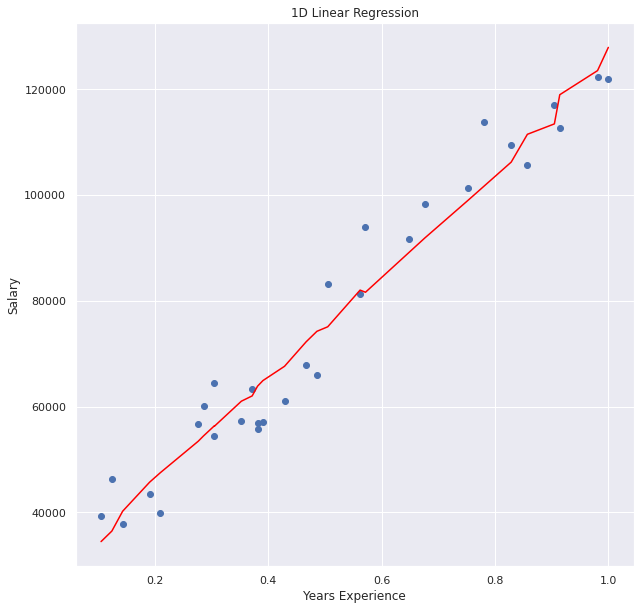

In [ ]:
fig= plt.figure(figsize=(10,10))
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.title('1D Linear Regression')
plt.show()

# Multiple Linear Regression

## Bước 1: Đọc dữ liệu


In [ ]:
df_startups = pd.read_csv('/content/drive/MyDrive/50_Startups.csv')
df_startups

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
X = df_startups.drop(columns=['Profit', 'State'])
y = df_startups['Profit']

### One hot encoder

In [ ]:
state = df_startups.drop(columns=['R&D Spend','Administration','Marketing Spend', 'Profit'])
state = pd.get_dummies(state)
state

,State_California,State_Florida,State_New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [ ]:
X = X.join(state)
X

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0
5,131876.90,99814.71,362861.36,0,0,1
6,134615.46,147198.87,127716.82,1,0,0
7,130298.13,145530.06,323876.68,0,1,0
8,120542.52,148718.95,311613.29,0,0,1
9,123334.88,108679.17,304981.62,1,0,0


## Bước 2: Chuẩn hóa dữ liệu

In [ ]:
for feature in X.columns:
    X[feature] /= X[feature].abs().max()
X

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,1.000000,0.749527,1.000000,0.0,0.0,1.0
1,0.983359,0.828805,0.940893,1.0,0.0,0.0
2,0.927985,0.553781,0.864664,0.0,1.0,0.0
3,0.873136,0.649738,0.812235,0.0,0.0,1.0
4,0.859438,0.500378,0.776136,0.0,1.0,0.0
5,0.797566,0.546494,0.769126,0.0,0.0,1.0
6,0.814128,0.805926,0.270710,1.0,0.0,0.0
7,0.788018,0.796789,0.686493,0.0,1.0,0.0
8,0.729018,0.814249,0.660500,0.0,0.0,1.0
9,0.745906,0.595028,0.646443,1.0,0.0,0.0


## Bước 3: Chia và train model với KFold

In [ ]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
model = LinearRegression()
scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)

In [ ]:
print(f"Accuracy: {np.mean(scores)}")

Accuracy: 0.9131199544021229


## Bước 4: Visualization

In [ ]:
y_pred = cross_val_predict(model, X, y, cv=cv)

In [ ]:
len(X.columns)

6

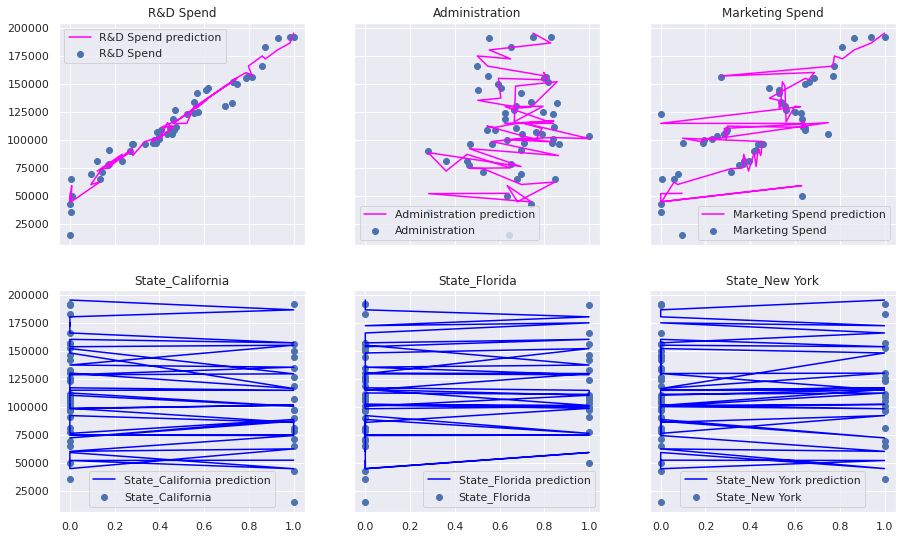

In [ ]:
color = ['magenta','blue']
i = 0
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(15, 9))
i = 0
j = 0
for feature in X.columns:
    ax[i][j].scatter(X[feature], y, label=feature)
    ax[i][j].plot(X[feature], y_pred, color=color[i], label=feature+' prediction')
    ax[i][j].title.set_text(feature)
    ax[i][j].legend()
    # ax.show()
    j += 1
    if (j == 3):
        j = 0
        i += 1

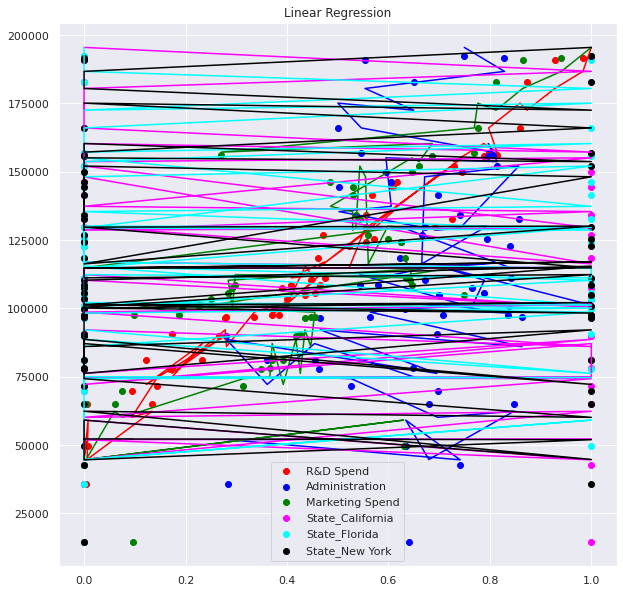

In [ ]:
fig= plt.figure(figsize=(10,10))
color = ['red', 'blue', 'green', 'magenta', 'cyan', 'black']
i = 0
for feature in X.columns:
    plt.scatter(X[feature], y, color=color[i], label=feature)
    plt.plot(X[feature], y_pred, color=color[i])
    i += 1

plt.title('Linear Regression')
plt.legend()
plt.show()

# SVR

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
X = df['Level'].values
y = df['Salary']

## Chuẩn hóa dữ liệu

In [ ]:
X = StandardScaler().fit_transform(X.reshape(-1, 1))
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [ ]:
y = StandardScaler().fit_transform(y.values.reshape(-1, 1))
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [ ]:
model = SVR(kernel='rbf')
cv = KFold(n_splits=5, random_state=264, shuffle=True)
scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)

In [ ]:
scores

array([0.20497963, 0.85411359, 0.86266471, 0.91388127, 0.92988167])

In [ ]:
print(f"Accuracy: {np.mean(scores)}")

Accuracy: 0.7531041736185173


## Visualization

In [ ]:
y_pred = cross_val_predict(model, X, y, cv=cv)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

array([-0.48680307, -0.62937489, -0.57013143, -0.47450476, -0.45285707,
       -0.35061267, -0.0832029 ,  0.3488754 ,  0.63358762,  0.53534086])

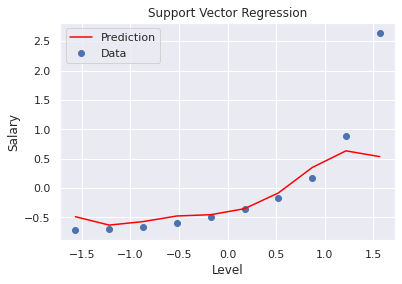

In [ ]:
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='Prediction')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

# Random Forest Regression

In [ ]:
model = RFG(max_depth=4, random_state=20)
cv = KFold(n_splits=5, random_state=264, shuffle=True)
scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)

In [ ]:
scores

array([0.20493535, 0.97878163, 0.98046039, 0.92998132, 0.65492914])

In [ ]:
print(f"Accuracy: {np.mean(scores)}")

Accuracy: 0.7498175660542626


## Visualization

In [ ]:
y_pred = cross_val_predict(model, X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 

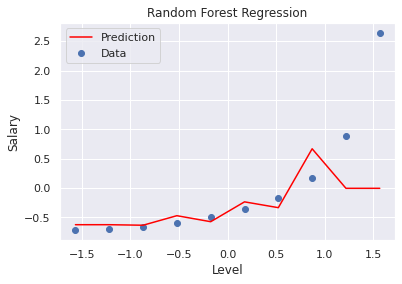

In [ ]:
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='Prediction')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Random Forest Regression')
plt.legend()
plt.show()